In [70]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import os

In [ ]:
path = "data/interim/networks"

dem_edge_all = []
rep_edge_all = []
bi_edge_all = []

columns = ["congress", "committee", "dem", "rep", "bi"]

edge_stats = pd.DataFrame(columns=columns)

for file in os.listdir(path):

    congress = file.split("_")[0]
    committee = file[4:8]

    G = nx.read_graphml(os.path.join(path, file))

    dem_edge = []
    rep_edge = []
    bi_edge = []

    for edge in G.edges:
        party_1 = G.nodes[edge[0]]["dem"]
        party_2 = G.nodes[edge[1]]["dem"]

        if party_1 == "0.0" and party_2 == "0.0":
            dem_edge.append(G.edges[edge[0], edge[1]]["cosine_similarity"])
            dem_edge_all.append(G.edges[edge[0], edge[1]]["cosine_similarity"])
        elif party_1 == "1.0" and party_2 == "1.0":
            rep_edge.append(G.edges[edge[0], edge[1]]["cosine_similarity"])
            rep_edge_all.append(G.edges[edge[0], edge[1]]["cosine_similarity"])
        else:
            bi_edge.append(G.edges[edge[0], edge[1]]["cosine_similarity"])
            bi_edge_all.append(G.edges[edge[0], edge[1]]["cosine_similarity"])
            
    
    if len(dem_edge) == 0:
        dem_edge = [0]
    
    if len(rep_edge) == 0:
        rep_edge = [0]

    if len(bi_edge) == 0:
        bi_edge = [0]

    df = pd.DataFrame(data=[[congress, committee, dem_edge, rep_edge, bi_edge]], columns=columns)
    edge_stats = pd.concat([edge_stats, df], ignore_index=True)

edge_stats


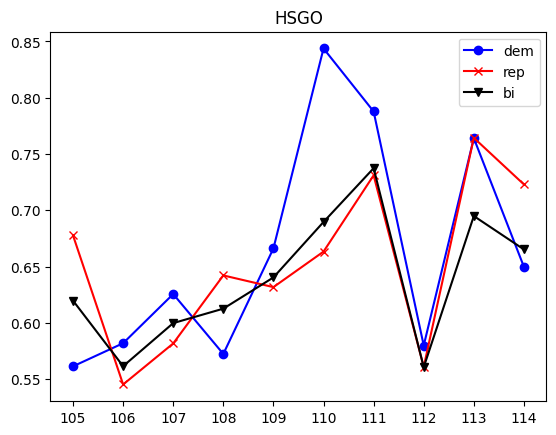

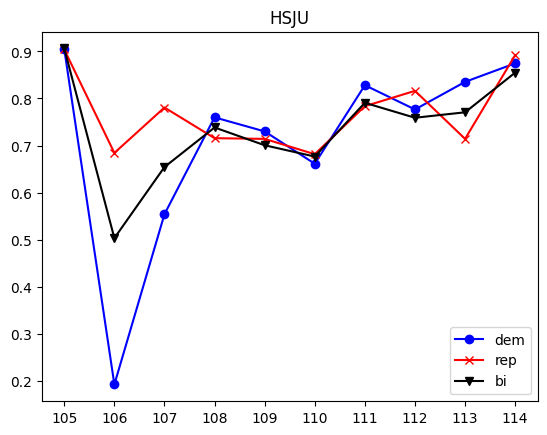

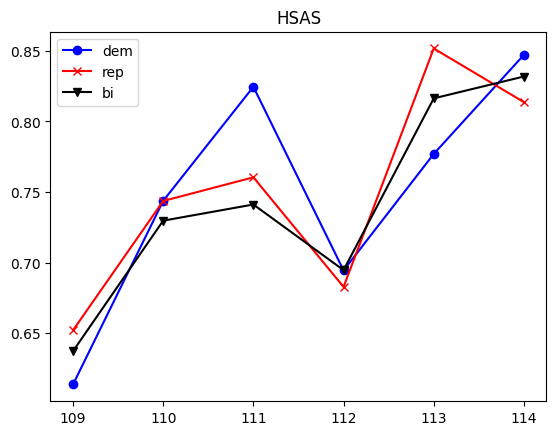

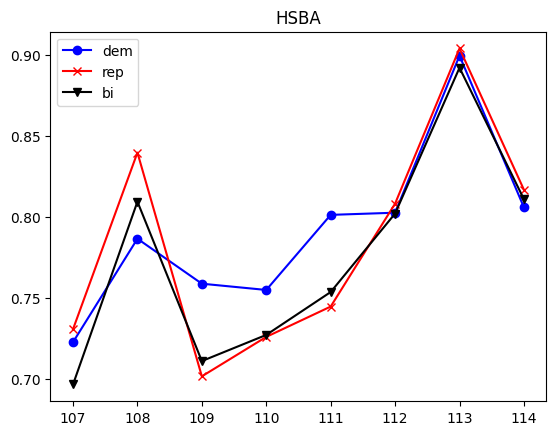

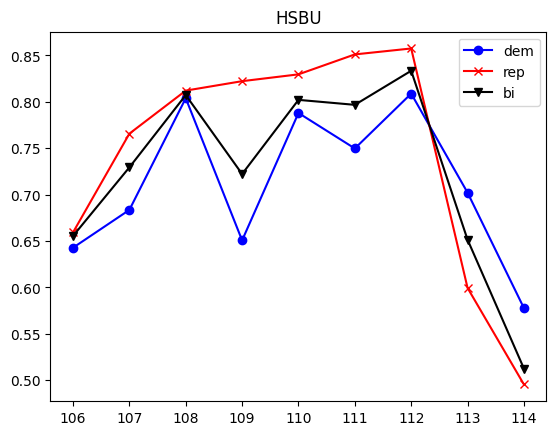

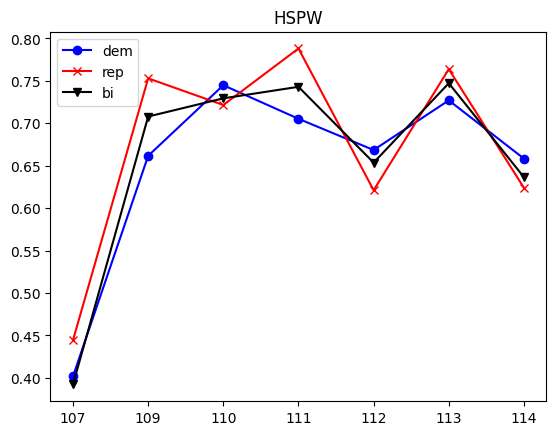

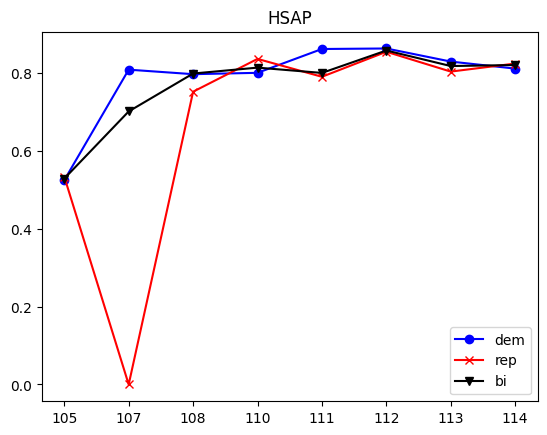

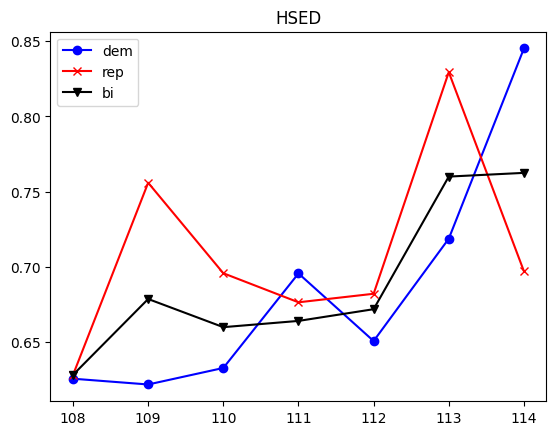

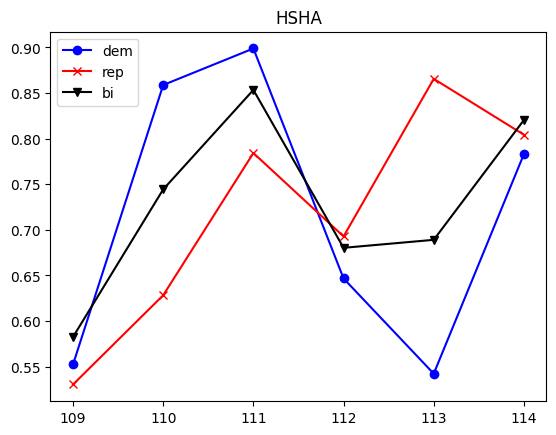

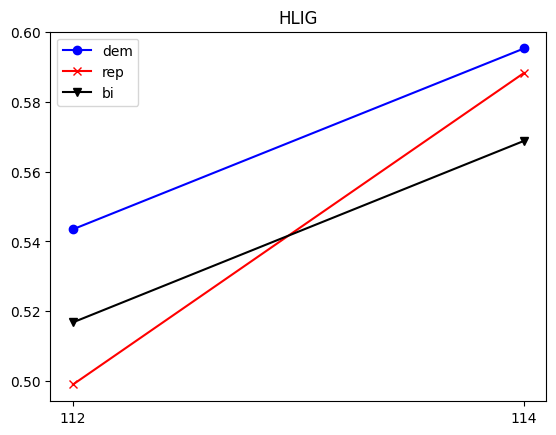

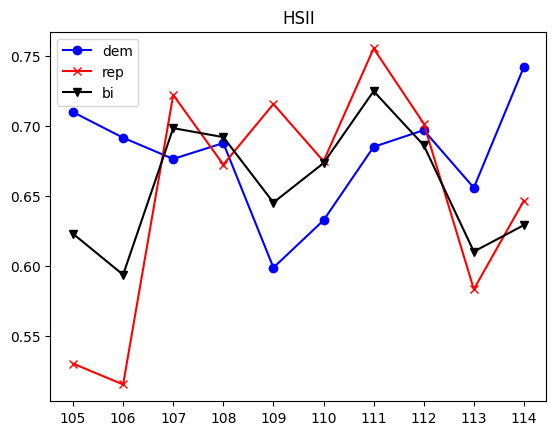

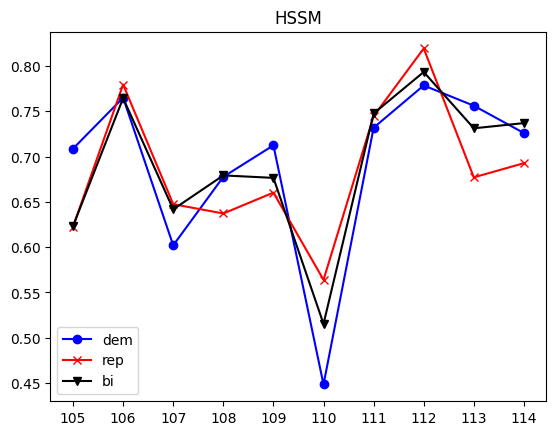

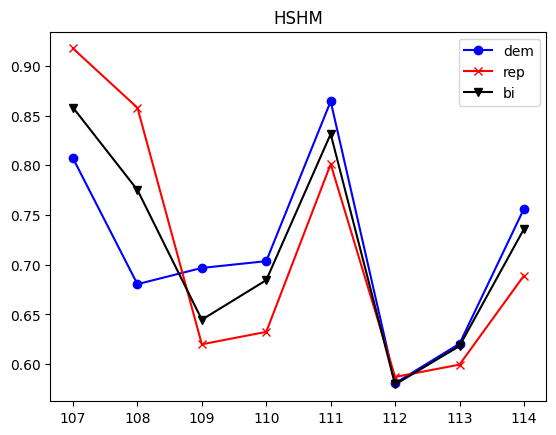

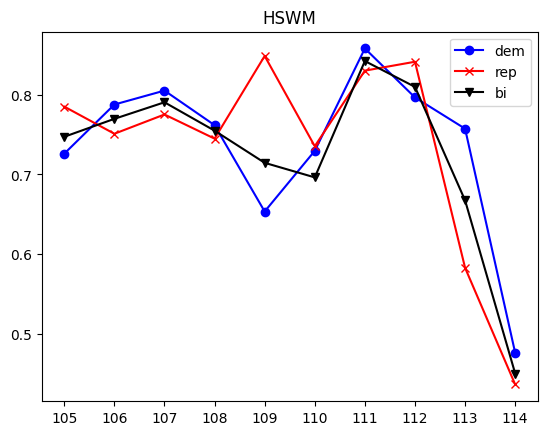

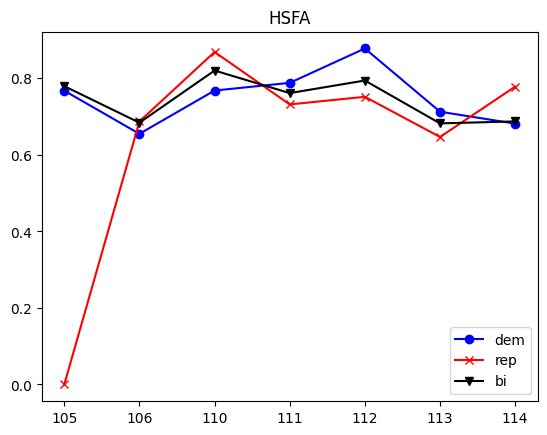

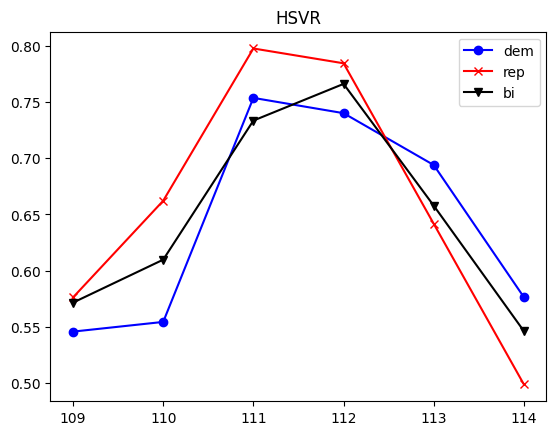

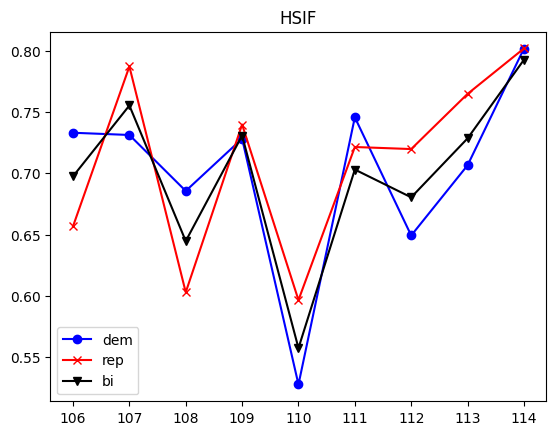

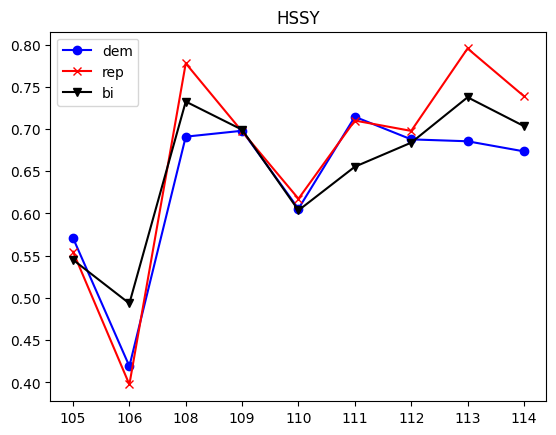

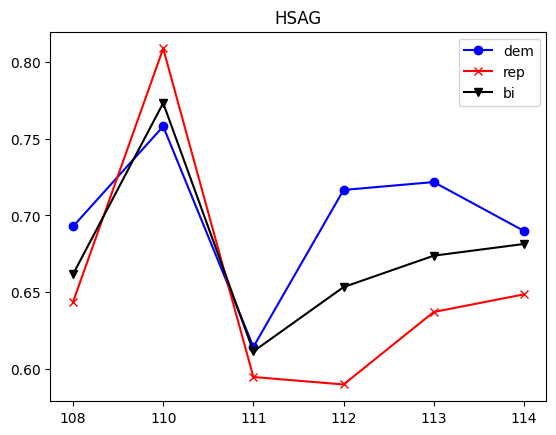

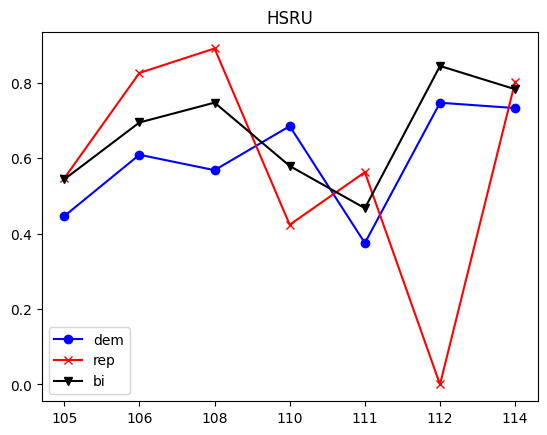

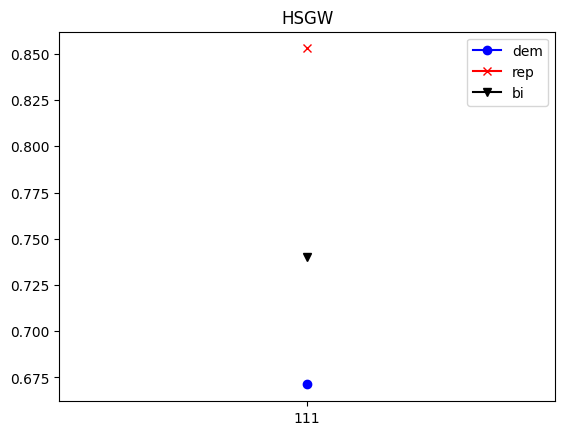

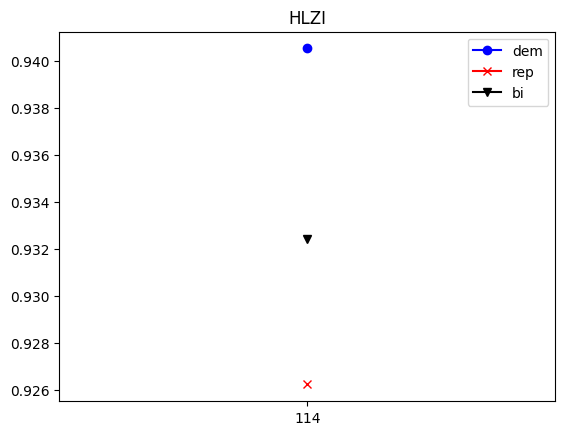

In [92]:
for committee in edge_stats["committee"].unique():
    stats = edge_stats[edge_stats["committee"] == committee]

    df = stats.sort_values(by="congress", ascending=True)

    dem_edges = df[df["committee"] == committee]["dem"].apply(np.mean).values.tolist()
    rep_edges = df[df["committee"] == committee]["rep"].apply(np.mean).values.tolist()
    bi_edges = df[df["committee"] == committee]["bi"].apply(np.mean).values.tolist()
    congresses = df["congress"].values.tolist()

    plt.plot(dem_edges, color = "blue", marker = 'o')
    plt.plot(rep_edges, color = "red", marker = 'x')
    plt.plot(bi_edges, color = "black", marker = 'v')
    plt.xticks(range(len(congresses)), congresses)

    plt.title(committee)
    plt.legend(["dem", "rep", "bi"])

    plt.show()



In [81]:
s = edge_stats.sort_values(by="congress", ascending=True)

s[s["committee"] == "HSRU"]["dem"].apply(np.mean)

63     0.446603
129    0.609460
43     0.568510
72     0.685330
62     0.375177
155    0.747425
108    0.733224
Name: dem, dtype: float64